In [2]:
import pandas as pd

# read the csv file into a pandas dataframe 'eik.csv'
eik = pd.read_csv('../../eik.csv', sep=';', decimal=',')

# use header 'boom' as index
# eik = eik.set_index('Boom')

# remove rows corresponding to the last 3 numbers of my student number: 20215256 -> 256, i=2, j=5, k=6
i, j, k = 2, 5, 6

# remove using the following formulas: k + 1, j + 1, i + 1, jk + 1, ij + 1, ik + 1, ijk + 1 en i + j + k + 1
# one entry is not possible to remove, namely: ijk + 1 = 61, due to index out of bounds
eik = eik.drop([k + 1, j + 1, i + 1, j * k + 1, i * j + 1, i * k + 1, i + j + k + 1])

In [3]:
from scipy.stats import chi2_contingency # voor chi-kwadraattoets

# Maak nieuwe variabele 'dikke eikel' aan, waarbij de waarde 'True' is als de diameter van de eikel groter is dan 3 cm anders 'False'
eik['dikke eikel'] = eik['Volume'] >= 3

# Maak kruistabel van 'dikke eikel' en 'Regio'
crosstab = pd.crosstab(eik['dikke eikel'], eik['Regio'])
print(crosstab)
# Voer chi-kwadraattoets uit
chi2, p_value, _, _ = chi2_contingency(crosstab)

# Print resultaat
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
eik

Regio        Atlantic    California
dikke eikel                        
False                14           5
True                  8           5
Chi-square statistic: 0.11542142068457859
P-value: 0.7340543830489092


,Boom,Regio,Grootte,Volume,Hoogte,dikke eikel
0,1,Atlantic,24196,1.4,27.0,False
1,2,Atlantic,7900,3.4,21.0,True
2,3,Atlantic,23038,9.1,25.0,True
4,5,Atlantic,7646,10.5,24.0,True
5,6,Atlantic,19938,2.5,17.0,False
8,9,Atlantic,8982,1.8,24.0,False
9,10,Atlantic,233,0.3,11.0,False
10,11,Atlantic,1598,0.9,15.0,False
12,13,Atlantic,17042,2.0,24.0,False
15,16,Atlantic,13688,1.8,30.0,False


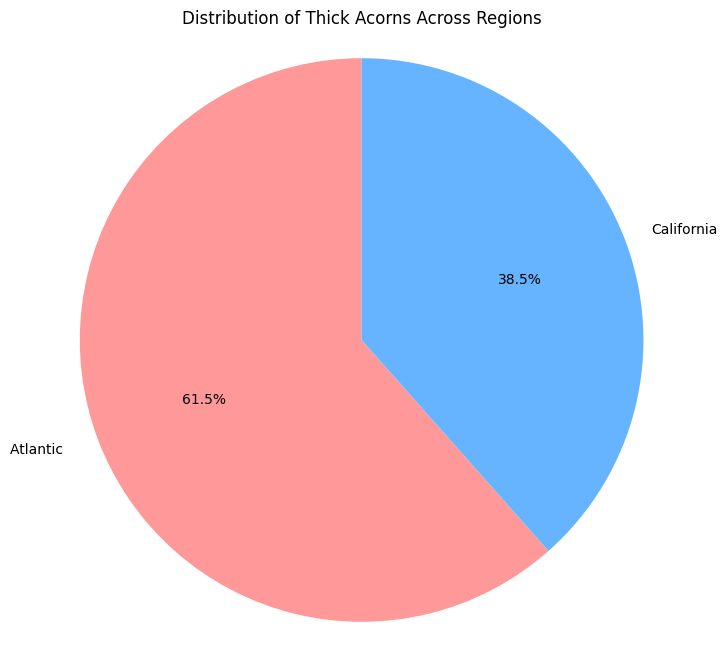

In [70]:
import matplotlib.pyplot as plt

# Calculate the count of thick acorns for each region
thick_acorns_count = eik[eik['dikke eikel']]['Regio'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the figure size

# Set colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Add more colors if needed

# Plot the pie chart
plt.pie(thick_acorns_count, labels=thick_acorns_count.index, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Thick Acorns Across Regions')

# Set aspect ratio to equal to ensure a circular pie chart
plt.axis('equal')

# save the pie chart as a png file
plt.savefig('images/vraag2/pie_chart.png')

# Display the pie chart
plt.show()
